# Vegetation

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Fundstellen in DB auslesen

In [2]:
sql = """SELECT
           ort_name,
           ort_kurz,
           x_long,
           y_lat
       FROM t_Ort
       WHERE ort_lit = 'DS'""".replace('\n',' ')

df = pd.read_sql(sql, con)

display(df.head())

,ort_name,ort_kurz,x_long,y_lat
0,Gombe,GMB,17.580406,-0.704069
1,?,MBD,NaN,NaN
2,Bojenjo,BJJ,17.432057,-0.006791
3,Bokuma,BKA,17.478148,0.099491
4,Boleko,BLK,17.221926,-0.805556


In [3]:
# Tabelle in CSV schreiben, um sie in QGIS zu nutzen:
df.to_csv('../data/processed/1-5_Vegetation_FdSt-DS.csv', index = False, encoding='utf-8')

## Vegetation an der FdSt (MODIS)

In QGIS mit dem *Point sampling tool* den Vegetationsindex aus einem MODIS-Datensatz auf den Punkt-Layer übertragen und mit der *modis_palette.csv* verknüpft.

In [4]:
df = pd.read_csv('../data/processed/1.7 Vegetation - FdSt-DS Koord - MODIS.csv')
display(df.head())

,X,Y,ort_name,ort_kurz,x_long,y_lat,2015011112,modis_palette_HTML,modis_palette_MODIS
0,17.580406,-0.704069,Gombe,GMB,17.580406,-0.704069,14.0,#999355,Cropland/Natural vegetation mosaic
1,17.432057,-0.006791,Bojenjo,BJJ,17.432057,-0.006791,11.0,#4682b2,Permanent wetlands
2,17.478148,0.099491,Bokuma,BKA,17.478148,0.099491,9.0,#ffd600,Savannas
3,17.221926,-0.805556,Boleko,BLK,17.221926,-0.805556,2.0,#31cd31,Evergreen Broadleaf forest
4,17.365479,-0.552494,Botwale,BTW,17.365479,-0.552494,2.0,#31cd31,Evergreen Broadleaf forest


> **ToDo:**
>
> [ ] Die Information über die Vegetaionszone wieder in die DB einpielen

In [5]:
df_pivot = df.pivot_table(values = 'ort_name', index = ['2015011112', 'modis_palette_MODIS'], aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['ort_name']/df_pivot['ort_name'].sum()*100
df_pivot = df_pivot.sort_index(by=['Prozent'], ascending=[True])
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,,ort_name,Prozent
2015011112,modis_palette_MODIS,,
0.0,Water,1,0.813008
5.0,Mixed forest,1,0.813008
6.0,Closed shrublands,1,0.813008
9.0,Savannas,1,0.813008
12.0,Croplands,3,2.439024
13.0,Urban and built-up,3,2.439024
14.0,Cropland/Natural vegetation mosaic,6,4.878049
8.0,Woody savannas,11,8.943089
2.0,Evergreen Broadleaf forest,46,37.398374


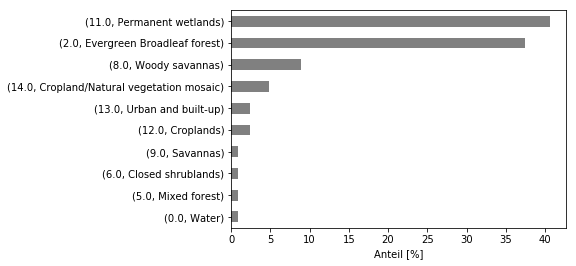

In [6]:
df_pivot['Prozent'].plot(kind = 'barh', color = 'grey')
plt.xlabel('Anteil [%]')
plt.ylabel('')
plt.show()

## Vegetation nach <code>\cite{Mayaux.2003}</code>

In QGIS mit dem *Point sampling tool* den Vegetationsindex aus einem <code>Africa_v5_Grid/Grid/africa_v5/hdr.adf</code>-Datensatz auf den Punkt-Layer übertragen und mit der <code>Africa_v5_legend.dbf</code> verknüpft.

In [7]:
df = pd.read_csv('../data/processed/1-5_Vegetation_FdSt-DS_hdr.csv')
display(df.head())

,X,Y,ort_name,ort_kurz,x_long,y_lat,hdr,Africa_v5_legend_CLASSNAMES
0,17.580406,-0.704069,Gombe,GMB,17.580406,-0.704069,26.0,Waterbodies
1,17.432057,-0.006791,Bojenjo,BJJ,17.432057,-0.006791,17.0,Swamp bushland and grassland
2,17.478148,0.099491,Bokuma,BKA,17.478148,0.099491,17.0,Swamp bushland and grassland
3,17.221926,-0.805556,Boleko,BLK,17.221926,-0.805556,18.0,Croplands (>50%)
4,17.365479,-0.552494,Botwale,BTW,17.365479,-0.552494,18.0,Croplands (>50%)


In [8]:
df_pivot = df.pivot_table(values = 'ort_name', index = 'Africa_v5_legend_CLASSNAMES', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['ort_name']/df_pivot['ort_name'].sum()*100
df_pivot = df_pivot.sort_index(by=['Prozent'], ascending=[False])
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,ort_name,Prozent
Africa_v5_legend_CLASSNAMES,,
Closed evergreen lowland forest,37,30.081301
Swamp forest,25,20.325203
Waterbodies,21,17.073171
Swamp bushland and grassland,17,13.821138
Deciduous woodland,8,6.504065
Croplands (>50%),5,4.065041
Closed grassland,4,3.252033
Deciduous shrubland with sparse trees,2,1.626016
Mosaic Forest / Savanna,2,1.626016


C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


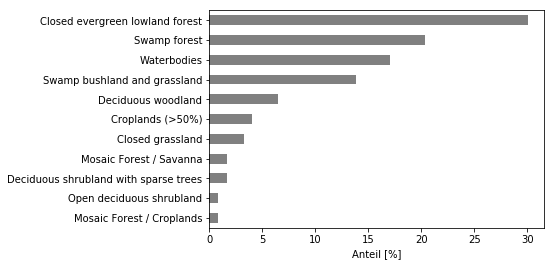

In [9]:
df_pivot = df_pivot.sort_index(by=['Prozent'], ascending=[True])
df_pivot['Prozent'].plot(kind = 'barh', color = 'grey')
plt.xlabel('Anteil [%]')
plt.ylabel('')
plt.savefig('../output/figs/1-5_Vegetation_Kl_Mayaux2003.pdf', bbox_inches='tight')
plt.show()